# Proyek Akhir: Menyelesaikan Permasalahan Institut Pendidikan

- Nama: Haldies Gerhardien Pasya
- Email: haldiespasya@gmail.com
- Id Dicoding: haldies

## Persiapan

### Menyiapkan library yang dibutuhkan

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
import joblib
from sklearn.feature_selection import chi2
from scipy.stats import pearsonr

### Menyiapkan data yang akan digunakan

## Data Understanding

In [3]:
url = 'https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/refs/heads/main/students_performance/data.csv'
student = pd.read_csv(url, sep=';')
student

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [4]:
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

- Terdapat 37 kolom yang teridiri dari :</br>
a. 7 kolom data float </br>
b. 29 kolom data integer </br>
c. 1 kolom data object </br>

In [5]:
student.describe()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [6]:
student.isna().sum()

,0
Marital_status,0
Application_mode,0
Application_order,0
Course,0
Daytime_evening_attendance,0
Previous_qualification,0
Previous_qualification_grade,0
Nacionality,0
Mothers_qualification,0
Fathers_qualification,0


insight : tidak yang null

In [7]:
print("Jumlah duplikasi: ", student.duplicated().sum())

Jumlah duplikasi:  0


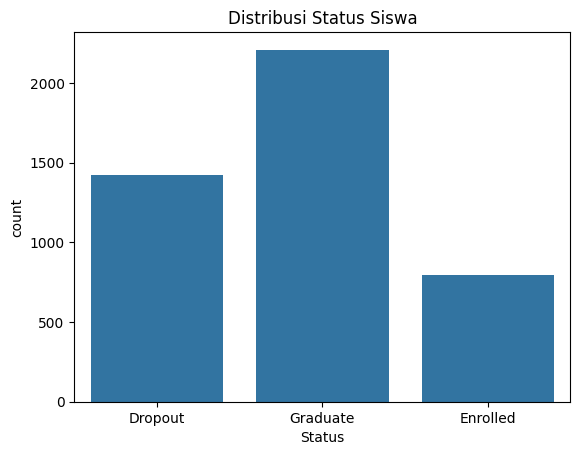

In [8]:
sns.countplot(x='Status', data=student)
plt.title("Distribusi Status Siswa")
plt.show()

In [9]:
le = LabelEncoder()
student['Status_encoded'] = le.fit_transform(student['Status'])

numerical_cols = student.select_dtypes(include=['float64', 'int64']).columns.tolist()
numerical_cols.remove('Status_encoded')

categorical_cols = student.select_dtypes(include=['int64']).columns.difference(numerical_cols).tolist()

pearson_corr = {}

for col in numerical_cols:
    corr, _ = pearsonr(student[col], student['Status_encoded'])
    pearson_corr[col] = abs(corr)

# Urutkan berdasarkan korelasi tertinggi
pearson_corr = dict(sorted(pearson_corr.items(), key=lambda x: x[1], reverse=True))

print("=== Korelasi Pearson (numerik) dengan Status ===")
for k, v in pearson_corr.items():
    print(f"{k}: {v:.4f}")


=== Korelasi Pearson (numerik) dengan Status ===
Curricular_units_2nd_sem_approved: 0.6242
Curricular_units_2nd_sem_grade: 0.5668
Curricular_units_1st_sem_approved: 0.5291
Curricular_units_1st_sem_grade: 0.4852
Tuition_fees_up_to_date: 0.4098
Scholarship_holder: 0.2976
Age_at_enrollment: 0.2434
Debtor: 0.2410
Gender: 0.2293
Application_mode: 0.2217
Curricular_units_2nd_sem_enrolled: 0.1758
Curricular_units_1st_sem_enrolled: 0.1560
Admission_grade: 0.1209
Displaced: 0.1140
Previous_qualification_grade: 0.1038
Curricular_units_2nd_sem_without_evaluations: 0.0940
Curricular_units_2nd_sem_evaluations: 0.0927
Marital_status: 0.0898
Application_order: 0.0898
Daytime_evening_attendance: 0.0751
Curricular_units_1st_sem_without_evaluations: 0.0687
Previous_qualification: 0.0560
Curricular_units_2nd_sem_credited: 0.0540
Curricular_units_1st_sem_credited: 0.0481
Curricular_units_1st_sem_evaluations: 0.0444
GDP: 0.0441
Mothers_qualification: 0.0432
Course: 0.0342
Inflation_rate: 0.0269
Nacionality

Status_label  Curricular_units_2nd_sem_approved  Curricular_units_2nd_sem_grade  Curricular_units_1st_sem_approved  Curricular_units_1st_sem_grade
     Dropout                               2757                     8382.960506                               3626                    10311.707505
    Enrolled                               3222                     8827.187280                               3429                     8833.454279
    Graduate                              13645                    28048.282331                              13767                    27929.832865


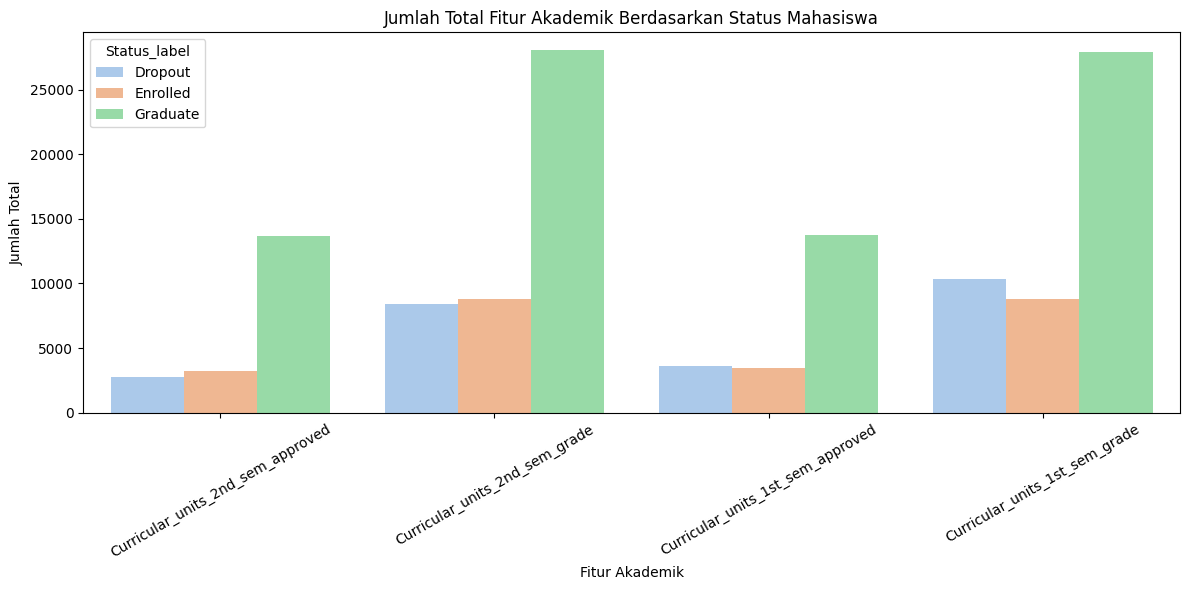

In [10]:
# Ubah status dari encoded ke label jika belum
student['Status_label'] = student['Status_encoded'].map({
    0: 'Dropout',
    1: 'Enrolled',
    2: 'Graduate'
})

features = [
    'Curricular_units_2nd_sem_approved',
    'Curricular_units_2nd_sem_grade',
    'Curricular_units_1st_sem_approved',
    'Curricular_units_1st_sem_grade'
]

# Hitung total (jumlah) per status
monitor_df = student.groupby('Status_label')[features].sum().reset_index()
print(monitor_df.to_string(index=False))
# Ubah ke format long (melted) untuk barplot
monitor_melted = monitor_df.melt(id_vars='Status_label', var_name='Fitur', value_name='Jumlah Total')


plt.figure(figsize=(12, 6))
sns.barplot(data=monitor_melted, x='Fitur', y='Jumlah Total', hue='Status_label', palette='pastel')
plt.title('Jumlah Total Fitur Akademik Berdasarkan Status Mahasiswa')
plt.xticks(rotation=30)
plt.ylabel('Jumlah Total')
plt.xlabel('Fitur Akademik')
plt.tight_layout()
plt.show()


**Insight:**

1. **Mahasiswa Lulus (Graduate) memiliki jumlah tertinggi di semua fitur akademik**

* **Jumlah mata kuliah lulus (approved)** semester 1 dan 2 jauh di atas kelompok lain.
* Begitu juga dengan total **nilai** semester 1 dan 2.
* Ini menunjukkan konsistensi akademik yang tinggi sepanjang awal masa studi.

**Implikasi:**
Mahasiswa yang berhasil menyelesaikan banyak mata kuliah sejak awal dan mendapat nilai baik **berpeluang besar untuk lulus**.

---

2. **Mahasiswa Dropout punya angka nilai dan kelulusan semester yang lebih rendah**

* Meskipun **jumlah mata kuliah lulus di semester 1** (3,626) sedikit lebih tinggi dari Enrolled (3,429), total **nilai mereka lebih tinggi di semester 1** tapi anjlok di semester 2.
* Penurunan tajam dari semester 1 ke semester 2:

  * Grade turun dari **10,311** → **8,383**
  * Approved turun dari **3,626** → **2,757**

**Implikasi:**
Kemungkinan banyak mahasiswa **kesulitan melanjutkan ke semester 2**, baik karena faktor akademik atau non-akademik (finansial, motivasi, dll). Ini bisa jadi momen penting untuk **early intervention**.

---

3. **Mahasiswa Enrolled (masih aktif) relatif stabil tapi moderat**

* Total kelulusan dan nilai berada di **tengah-tengah** antara Dropout dan Graduate.
* Jumlah kelulusan semester 2 lebih tinggi dari semester 1 → indikasi bahwa sebagian mahasiswa masih dalam progres perbaikan.

**Implikasi:**
Kelompok ini adalah target potensial untuk **monitoring lanjutan** — mereka belum gagal, tapi juga belum kuat untuk dijamin lulus.

---

**Kesimpulan**

* Mahasiswa yang **konsisten lulus dan mendapatkan nilai bagus sejak semester 1** sangat mungkin untuk **lulus**.
* Mahasiswa yang mengalami **penurunan performa di semester 2** berisiko **dropout**.
* Perlu ada **sistem pemantauan performa semester 1–2** untuk melakukan intervensi tepat waktu.



Rata-rata Usia Saat Masuk Kuliah Berdasarkan Status:
Status_label  Age_at_enrollment
     Dropout          26.068966
    Enrolled          22.369018
    Graduate          21.783612


<ipython-input-11-2540878723>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=age_mean, x='Status_label', y='Age_at_enrollment', palette='pastel')


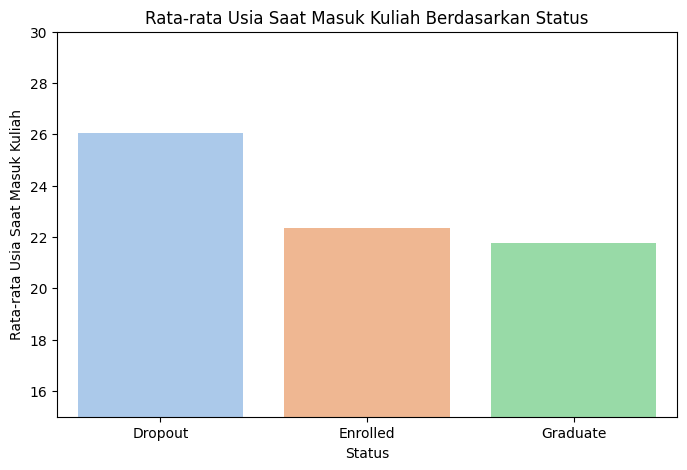

In [11]:
age_mean = student.groupby('Status_label')['Age_at_enrollment'].mean().reset_index()

print("Rata-rata Usia Saat Masuk Kuliah Berdasarkan Status:")
print(age_mean.to_string(index=False))

plt.figure(figsize=(8, 5))
sns.barplot(data=age_mean, x='Status_label', y='Age_at_enrollment', palette='pastel')
plt.title('Rata-rata Usia Saat Masuk Kuliah Berdasarkan Status')
plt.xlabel('Status')
plt.ylabel('Rata-rata Usia Saat Masuk Kuliah')
plt.ylim(15, 30)  # opsional, supaya skala y lebih jelas
plt.show()

### 🔍 **Insight:**

1. **Mahasiswa Dropout rata-rata lebih tua (26 tahun) dibandingkan yang Lulus atau Masih Kuliah**

   * Ini menunjukkan mahasiswa yang masuk kuliah pada usia lebih tua cenderung memiliki risiko lebih tinggi untuk dropout.
   * Mungkin karena faktor tanggung jawab lain (kerja, keluarga), kesulitan menyesuaikan diri, atau motivasi yang berbeda dibanding mahasiswa muda.

2. **Mahasiswa Graduate dan Enrolled usia masuk relatif muda (\~22 tahun)**

   * Usia yang lebih muda ini umumnya mahasiswa yang langsung melanjutkan ke perguruan tinggi dari sekolah menengah.
   * Mereka cenderung punya peluang lebih besar untuk menyelesaikan studi atau tetap aktif.

3. **Perbedaan usia ini bisa jadi variabel penting untuk sistem prediksi dan intervensi dini**

   * Contoh: Mahasiswa yang berusia lebih tua dapat diberi dukungan tambahan agar tidak dropout.



Jumlah Mahasiswa berdasarkan Status dan Gender:
          Perempuan (0)  Laki-laki (1)
Status                                
Dropout             720            701
Enrolled            487            307
Graduate           1661            548


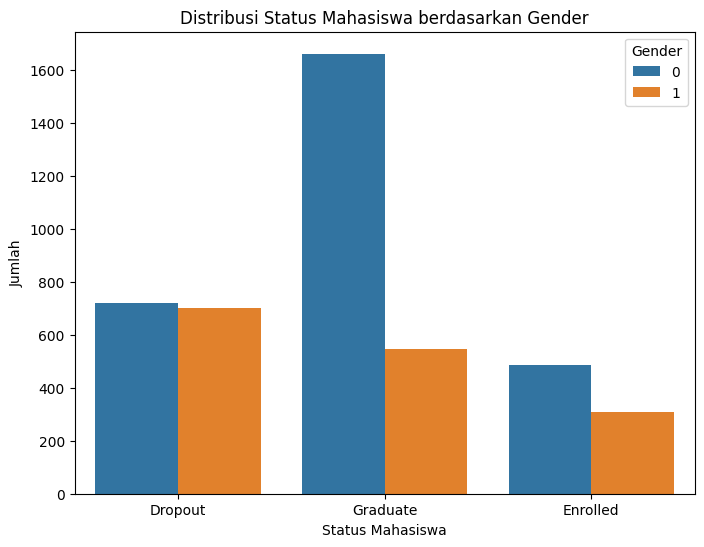

In [12]:
# Tabel jumlah (print)
print("Jumlah Mahasiswa berdasarkan Status dan Gender:")
status_gender_counts = pd.crosstab(student['Status'], student['Gender'])
status_gender_counts.columns = ['Perempuan (0)', 'Laki-laki (1)']
print(status_gender_counts)

plt.figure(figsize=(8,6))
sns.countplot(data=student, x='Status', hue='Gender')
plt.title('Distribusi Status Mahasiswa berdasarkan Gender')
plt.xlabel('Status Mahasiswa')
plt.ylabel('Jumlah')
plt.legend(title='Gender')
plt.show()

**Insight Penting:**
1. **Laki-laki Dropout Lebih Tinggi Proporsinya**

Walaupun jumlah total mahasiswa laki-laki **lebih sedikit**, mereka memiliki jumlah **dropout** hampir sama dengan perempuan:

* **720 perempuan** vs **701 laki-laki** dropout
* Dengan total:

  * Perempuan = 720 + 487 + 1661 = **2,868**
  * Laki-laki = 701 + 307 + 548 = **1,556**

Artinya, **dropout rate laki-laki jauh lebih tinggi**.

2. **Rasio Dropout:**

| Gender    | Dropout (%)            | Graduate (%)            |
| --------- | ---------------------- | ----------------------- |
| Perempuan | 720 / 2868 ≈ **25.1%** | 1661 / 2868 ≈ **57.9%** |
| Laki-laki | 701 / 1556 ≈ **45.1%** | 548 / 1556 ≈ **35.2%**  |

**Hampir setengah** dari mahasiswa laki-laki dropout.

Sementara mayoritas perempuan berhasil **graduate**.


Jumlah Mahasiswa Berdasarkan Status dan Debtor:
Status  Dropout  Enrolled  Graduate
Debtor                             
0          1109       704      2108
1           312        90       101


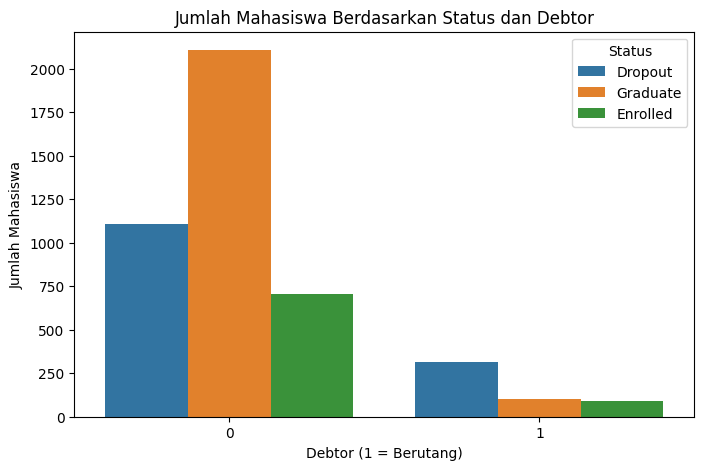

In [13]:
# Print jumlah mahasiswa per Debtor dan Status
jumlah_per_status = student.groupby(['Debtor', 'Status']).size().unstack(fill_value=0)
print("Jumlah Mahasiswa Berdasarkan Status dan Debtor:")
print(jumlah_per_status)

# Visualisasi
plt.figure(figsize=(8,5))
sns.countplot(data=student, x='Debtor', hue='Status')
plt.title('Jumlah Mahasiswa Berdasarkan Status dan Debtor')
plt.xlabel('Debtor (1 = Berutang)')
plt.ylabel('Jumlah Mahasiswa')
plt.legend(title='Status')
plt.show()


Insight-nya:

* **Mahasiswa yang *tidak berutang* (Debtor=0)** jumlahnya jauh lebih banyak secara keseluruhan (total 1109+704+2108 = 3921) dibanding yang *berutang* (Debtor=1, total 312+90+101 = 503).
* **Di kelompok *berutang* (Debtor=1)**, proporsi mahasiswa yang *dropout* relatif lebih tinggi jika dibandingkan dengan kelompok yang tidak berutang, karena dari 503 mahasiswa, 312 (sekitar 62%) adalah dropout.
* Sedangkan di kelompok *tidak berutang* (Debtor=0), jumlah dropout adalah 1109 dari total 3921, sekitar 28%, jauh lebih rendah.
* Mahasiswa yang *graduate* paling banyak ada di kelompok tidak berutang (2108), dan sangat sedikit di kelompok berutang (101).


Jumlah Mahasiswa Berdasarkan Status dan Tuition_fees_up_to_date:
Status                   Dropout  Enrolled  Graduate
Tuition_fees_up_to_date                             
0                            457        42        29
1                            964       752      2180


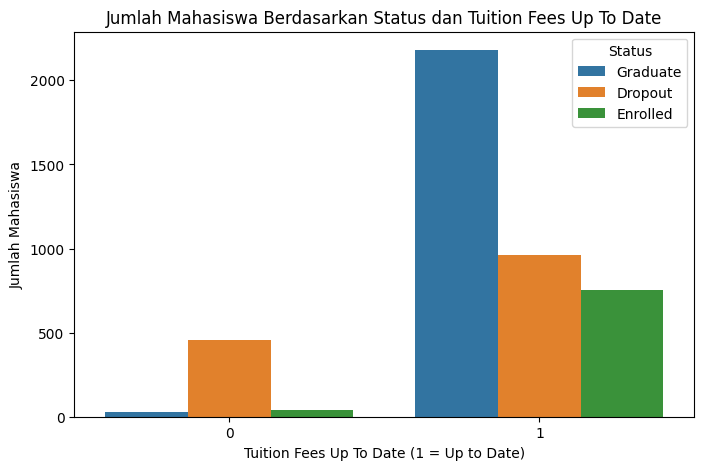

In [14]:

jumlah_per_status = student.groupby(['Tuition_fees_up_to_date', 'Status']).size().unstack(fill_value=0)
print("Jumlah Mahasiswa Berdasarkan Status dan Tuition_fees_up_to_date:")
print(jumlah_per_status)

plt.figure(figsize=(8,5))
sns.countplot(data=student, x='Tuition_fees_up_to_date', hue='Status')
plt.title('Jumlah Mahasiswa Berdasarkan Status dan Tuition Fees Up To Date')
plt.xlabel('Tuition Fees Up To Date (1 = Up to Date)')
plt.ylabel('Jumlah Mahasiswa')
plt.legend(title='Status')
plt.show()




Insight:

* Dari 528 mahasiswa yang **tidak bayar tepat waktu**, **\~87% dropout** (457 dari 528).
* Sebaliknya, dari 3896 mahasiswa yang **membayar tepat waktu**, hanya **\~25% yang dropout**.
* **Mayoritas lulusan (2180 orang)** adalah dari kelompok yang **membayar tepat waktu**.

👉 **Kesimpulan:**
Status pembayaran sangat berpengaruh terhadap kelulusan. Mahasiswa yang **tidak disiplin membayar** berisiko besar untuk **dropout**. Ini bisa menunjukkan masalah keuangan atau kurangnya komitmen.




Jumlah Mahasiswa Berdasarkan Status dan Scholarship Holder:
Status              Dropout  Enrolled  Graduate
Scholarship_holder                             
0                      1287       664      1374
1                       134       130       835


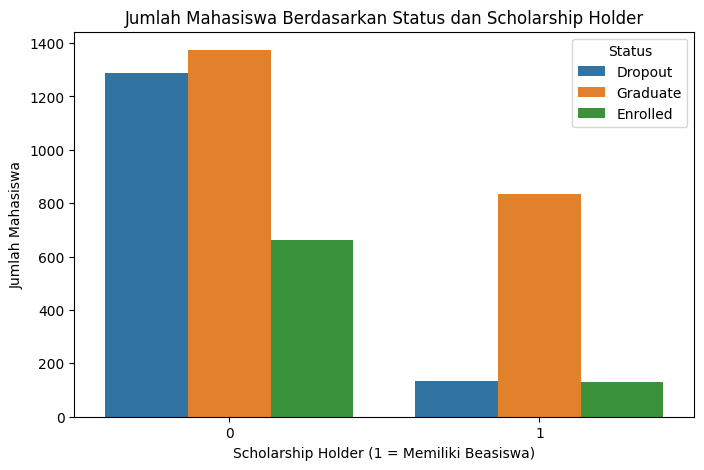

In [15]:
jumlah_per_status = student.groupby(['Scholarship_holder', 'Status']).size().unstack(fill_value=0)
print("Jumlah Mahasiswa Berdasarkan Status dan Scholarship Holder:")
print(jumlah_per_status)

plt.figure(figsize=(8,5))
sns.countplot(data=student, x='Scholarship_holder', hue='Status')
plt.title('Jumlah Mahasiswa Berdasarkan Status dan Scholarship Holder')
plt.xlabel('Scholarship Holder (1 = Memiliki Beasiswa)')
plt.ylabel('Jumlah Mahasiswa')
plt.legend(title='Status')
plt.show()



Insight:

* Mahasiswa **tanpa beasiswa** lebih banyak mengalami **dropout** (1287) dibanding yang lulus (1374).
* Sedangkan mahasiswa **penerima beasiswa** jauh lebih **berpeluang lulus** (835 lulusan vs 134 dropout).
* Persentase kelulusan pada penerima beasiswa:
  → **Lulus:** 835 / (134+130+835) ≈ **73%**
  → **Dropout:** hanya \~12%

👉 **Kesimpulan:**
**Beasiswa sangat berkontribusi positif** terhadap keberhasilan akademik. Mahasiswa dengan dukungan finansial tampaknya lebih stabil, termotivasi, dan berkomitmen.

## Data Preparation / Preprocessing

In [16]:
selected_features = [
    'Curricular_units_2nd_sem_approved',
    'Curricular_units_2nd_sem_grade',
    'Curricular_units_1st_sem_approved',
    'Curricular_units_1st_sem_grade',
    'Tuition_fees_up_to_date',
    'Scholarship_holder',
    'Age_at_enrollment',
    'Debtor',
    'Gender',
]

# Encode label Status
le = LabelEncoder()
student['Status'] = le.fit_transform(student['Status'])

# Buat dataset baru hanya dengan fitur terpilih + target
student_new = student[selected_features + ['Status']]

# Split data
X = student_new.drop("Status", axis=1)
y = student_new["Status"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

# Info
print(f'Total # of samples in whole dataset: {len(X)}')
print(f'Total # of samples in train dataset: {len(X_train)}')
print(f'Total # of samples in test dataset: {len(X_test)}')

# Simpan label encoder
joblib.dump(le, 'label_encoder_status.joblib')

Total # of samples in whole dataset: 4424
Total # of samples in train dataset: 3539
Total # of samples in test dataset: 885


['label_encoder_status.joblib']

## Modeling

In [17]:
# Definisikan setiap klasifikasi secara terpisah
knn = KNeighborsClassifier().fit(X_train, y_train)
dt = DecisionTreeClassifier().fit(X_train, y_train)
rf = RandomForestClassifier().fit(X_train, y_train)
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=24).fit(X_train, y_train)

print("Model training selesai.")

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [01:27:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Model training selesai.


## Evaluation

In [18]:
for model_name, model in [('SVM', knn), ('RF', rf), ('XGB', xgb_model)]:
    y_pred = model.predict(X_test)
    print(f"=== {model_name} ===")
    print(classification_report(y_test, y_pred, zero_division=0))


=== SVM ===
              precision    recall  f1-score   support

           0       0.73      0.70      0.71       300
           1       0.36      0.27      0.30       154
           2       0.76      0.85      0.80       431

    accuracy                           0.70       885
   macro avg       0.62      0.60      0.61       885
weighted avg       0.68      0.70      0.69       885

=== RF ===
              precision    recall  f1-score   support

           0       0.77      0.74      0.75       300
           1       0.41      0.27      0.33       154
           2       0.77      0.89      0.83       431

    accuracy                           0.73       885
   macro avg       0.65      0.63      0.64       885
weighted avg       0.71      0.73      0.71       885

=== XGB ===
              precision    recall  f1-score   support

           0       0.74      0.73      0.73       300
           1       0.38      0.27      0.32       154
           2       0.78      0.86      0

In [19]:
# # Menyimpan model terbaik
# joblib.dump(rf, 'best_model.pkl')

# # Simpan list kolom menggunakan joblib
# joblib.dump(X_train.columns.tolist(), 'model_columns.pkl')